### Importing Libraries

In [27]:
from sqlite_helper import *
import pandas as pd
import numpy as np
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# Exploratory Data Analysis

### By Airline (Delays, Cancellation, Diversion)

In [23]:
conn = create_connection('main.db')

In [24]:
#Delay by Airline
sql_statement = '''SELECT
    f.IATA_Code_Marketing_Airline AS Airline,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE Airline = 'DL' OR Airline = 'AA' OR Airline = 'UA' OR Airline = 'WN'
    GROUP BY Airline
    ORDER BY TotalDelayAverage DESC
'''
delay_by_airline = pd.read_sql_query(sql_statement, conn)

In [25]:
delay_by_airline.head()

,Airline,DepartingDelayAverage,ArrivalDelayAverage,TotalDelayAverage
0,UA,14.550718,14.799600,29.350318
1,AA,13.882014,13.999795,27.881810
2,WN,14.921043,12.789838,27.710880
3,DL,10.683166,10.458301,21.141467


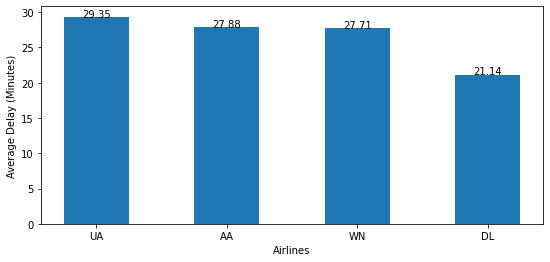

In [ ]:
plt.figure(figsize=(9, 4))
plt.bar(delay_by_airline['Airline'], delay_by_airline['TotalDelayAverage'], width = 0.5)
plt.xlabel('Airlines')
plt.ylabel('Average Delay (Minutes)')
for i in range(len(delay_by_airline['Airline'])):
    plt.text(i,delay_by_airline['TotalDelayAverage'][i]
             round(delay_by_airline['TotalDelayAverage'][i],2), ha = 'center')
plt.show()

In [ ]:
#Cancellation rate by Airline
sql_statement='''
SELECT f.IATA_Code_Marketing_Airline AS Airline,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
FROM flights f
WHERE Airline = 'DL' OR Airline = 'AA' OR Airline = 'UA' OR Airline = 'WN'
GROUP BY Airline
ORDER BY CancellationRatePercent DESC
'''
cancellation_by_airline = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(cancellation_by_airline)

  Airline  CancellationRatePercent
0      UA                 2.639959
1      AA                 2.583538
2      WN                 2.319371
3      DL                 1.306833


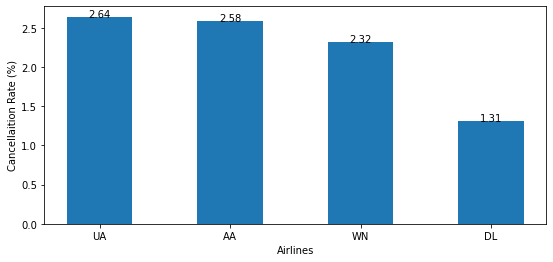

In [ ]:
plt.figure(figsize=(9, 4))
plt.bar(cancellation_by_airline['Airline'], cancellation_by_airline['CancellationRatePercent'], width = 0.5)
plt.xlabel('Airlines')
plt.ylabel('Cancellaition Rate (%)')
for i in range(len(cancellation_by_airline['CancellationRatePercent'])):
    plt.text(i,cancellation_by_airline['CancellationRatePercent'][i],
             round(cancellation_by_airline['CancellationRatePercent'][i],2), ha = 'center')
plt.show()

In [ ]:
#Diversion rate by Airline
sql_statement = '''
SELECT f.IATA_Code_Marketing_Airline AS Airline,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
FROM flights f
WHERE Airline = 'DL' OR Airline = 'AA' OR Airline = 'UA' OR Airline = 'WN'
GROUP BY Airline
ORDER BY DiversionRatePercent DESC
'''
diversion_by_airline = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(diversion_by_airline)

  Airline  DiversionRatePercent
0      UA              0.292676
1      AA              0.272379
2      WN              0.216524
3      DL              0.188943


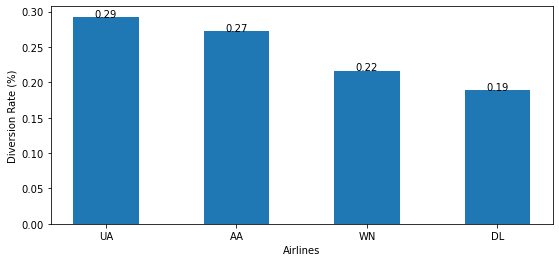

In [ ]:
plt.figure(figsize=(9, 4))
plt.bar(diversion_by_airline['Airline'], diversion_by_airline['DiversionRatePercent'], width = 0.5)
plt.xlabel('Airlines')
plt.ylabel('Diversion Rate (%)')
for i in range(len(diversion_by_airline['DiversionRatePercent'])):
    plt.text(i,diversion_by_airline['DiversionRatePercent'][i],
             round(diversion_by_airline['DiversionRatePercent'][i],2), ha = 'center')
plt.show()

### By Month (Delays, Cancellation, Diversion)

In [ ]:
#Delay by month
sql_statement = '''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
)


SELECT * FROM tmp
ORDER BY TotalDelayAverage DESC
'''
delay_by_month = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(delay_by_month)

        Month  DepartingDelayAverage  ArrivalDelayAverage  TotalDelayAverage
0        July              17.871995            17.408437          35.280432
1        June              17.918529            17.336399          35.254928
2      August              16.970659            16.718722          33.689382
3    December              15.051839            14.165860          29.217699
4     October              13.336888            12.570833          25.907721
5         May              12.613527            12.220915          24.834443
6    February              11.538036            11.627643          23.165679
7       April              11.140944            10.854914          21.995857
8       March              11.092852            10.845619          21.938472
9     January              10.624916            10.456521          21.081436
10   November              10.360073             9.408147          19.768220
11  September              10.011051             9.584086          19.595137

In [ ]:
#Delay by month
sql_statement = '''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 1
		WHEN strftime('%m', f.FlightDate) = '02' THEN 2
		WHEN strftime('%m', f.FlightDate) = '03' THEN 3
		WHEN strftime('%m', f.FlightDate) = '04' THEN 4
		WHEN strftime('%m', f.FlightDate) = '05' THEN 5
		WHEN strftime('%m', f.FlightDate) = '06' THEN 6
		WHEN strftime('%m', f.FlightDate) = '07' THEN 7
		WHEN strftime('%m', f.FlightDate) = '08' THEN 8
		WHEN strftime('%m', f.FlightDate) = '09' THEN 9
		WHEN strftime('%m', f.FlightDate) = '10' THEN 10
		WHEN strftime('%m', f.FlightDate) = '11' THEN 11
		WHEN strftime('%m', f.FlightDate) = '12' THEN 12
	END MonthNumber,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
)


SELECT Month, DepartingDelayAverage, ArrivalDelayAverage, TotalDelayAverage FROM tmp
ORDER BY MonthNumber
'''
delay_by_month = pd.read_sql_query(sql_statement, conn)

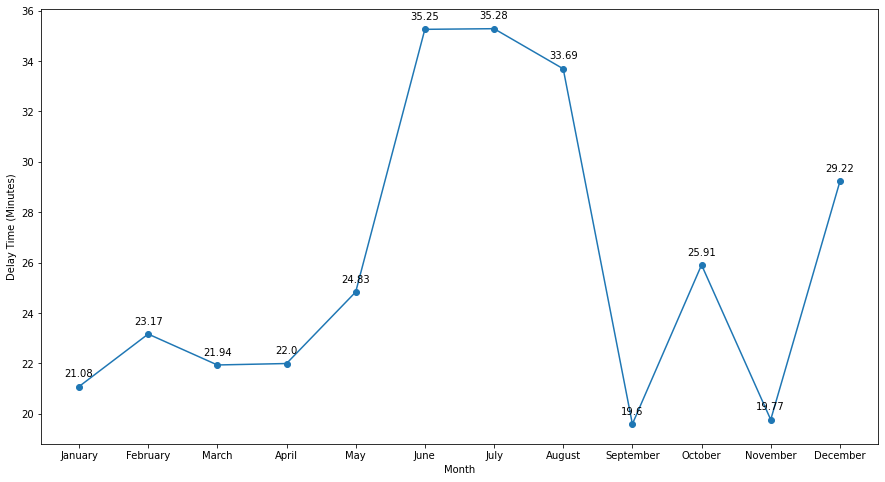

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(delay_by_month['Month'], delay_by_month['TotalDelayAverage'], marker='o', linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Delay Time (Minutes)')
for i in range(len(delay_by_month['TotalDelayAverage'])):
    plt.annotate(round(delay_by_month['TotalDelayAverage'][i],2),
                 (i,delay_by_month['TotalDelayAverage'][i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

In [ ]:
#Cancellation rate by month
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
    ORDER BY CancellationRatePercent DESC
)


SELECT * FROM tmp
ORDER BY CancellationRatePercent DESC
'''
cancellation_by_month = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(cancellation_by_month)

        Month  CancellationRatePercent
0    February                 5.255416
1     January                 4.195801
2      August                 2.777532
3        June                 2.546937
4     October                 2.288984
5    December                 1.952426
6        July                 1.762907
7   September                 1.392084
8       March                 1.313447
9         May                 1.301966
10      April                 1.037783
11   November                 0.600816


In [ ]:
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 1
		WHEN strftime('%m', f.FlightDate) = '02' THEN 2
		WHEN strftime('%m', f.FlightDate) = '03' THEN 3
		WHEN strftime('%m', f.FlightDate) = '04' THEN 4
		WHEN strftime('%m', f.FlightDate) = '05' THEN 5
		WHEN strftime('%m', f.FlightDate) = '06' THEN 6
		WHEN strftime('%m', f.FlightDate) = '07' THEN 7
		WHEN strftime('%m', f.FlightDate) = '08' THEN 8
		WHEN strftime('%m', f.FlightDate) = '09' THEN 9
		WHEN strftime('%m', f.FlightDate) = '10' THEN 10
		WHEN strftime('%m', f.FlightDate) = '11' THEN 11
		WHEN strftime('%m', f.FlightDate) = '12' THEN 12
	END MonthNumber,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
    ORDER BY CancellationRatePercent DESC
)


SELECT * FROM tmp
ORDER BY MonthNumber
'''
cancellation_by_month = pd.read_sql_query(sql_statement, conn)

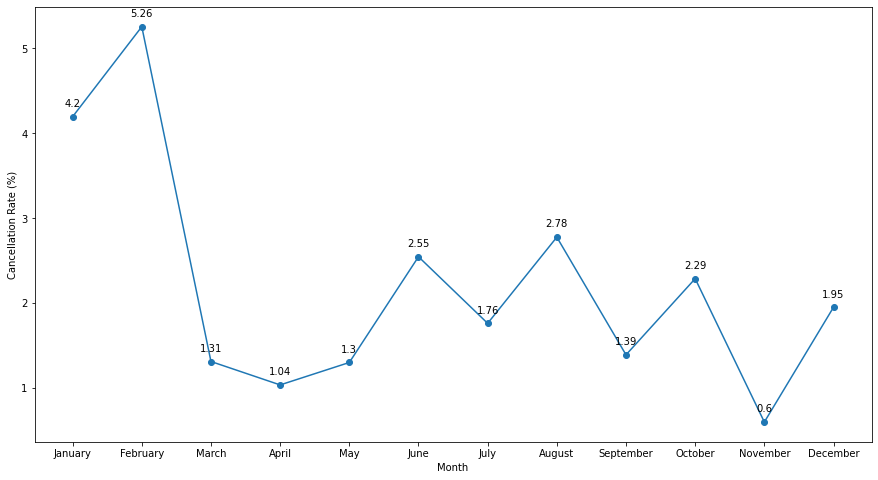

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(cancellation_by_month['Month'], cancellation_by_month['CancellationRatePercent'], marker='o', linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
for i in range(len(cancellation_by_month['CancellationRatePercent'])):
    plt.annotate(round(cancellation_by_month['CancellationRatePercent'][i],2),
                 (i,cancellation_by_month['CancellationRatePercent'][i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

In [ ]:
#Diversion rate by month
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
    ORDER BY DiversionRatePercent DESC
)


SELECT * FROM tmp
ORDER BY DiversionRatePercent DESC
'''
diversion_by_month = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(diversion_by_month)

        Month  DiversionRatePercent
0      August              0.376848
1        July              0.358321
2        June              0.317866
3         May              0.267712
4    December              0.230551
5       March              0.219252
6       April              0.204417
7     October              0.185021
8     January              0.182382
9    February              0.177644
10  September              0.173038
11   November              0.125135


In [ ]:
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 'January'
		WHEN strftime('%m', f.FlightDate) = '02' THEN 'February'
		WHEN strftime('%m', f.FlightDate) = '03' THEN 'March'
		WHEN strftime('%m', f.FlightDate) = '04' THEN 'April'
		WHEN strftime('%m', f.FlightDate) = '05' THEN 'May'
		WHEN strftime('%m', f.FlightDate) = '06' THEN 'June'
		WHEN strftime('%m', f.FlightDate) = '07' THEN 'July'
		WHEN strftime('%m', f.FlightDate) = '08' THEN 'August'
		WHEN strftime('%m', f.FlightDate) = '09' THEN 'September'
		WHEN strftime('%m', f.FlightDate) = '10' THEN 'October'
		WHEN strftime('%m', f.FlightDate) = '11' THEN 'November'
		WHEN strftime('%m', f.FlightDate) = '12' THEN 'December'
	END Month,
    CASE
		WHEN strftime('%m', f.FlightDate) = '01' THEN 1
		WHEN strftime('%m', f.FlightDate) = '02' THEN 2
		WHEN strftime('%m', f.FlightDate) = '03' THEN 3
		WHEN strftime('%m', f.FlightDate) = '04' THEN 4
		WHEN strftime('%m', f.FlightDate) = '05' THEN 5
		WHEN strftime('%m', f.FlightDate) = '06' THEN 6
		WHEN strftime('%m', f.FlightDate) = '07' THEN 7
		WHEN strftime('%m', f.FlightDate) = '08' THEN 8
		WHEN strftime('%m', f.FlightDate) = '09' THEN 9
		WHEN strftime('%m', f.FlightDate) = '10' THEN 10
		WHEN strftime('%m', f.FlightDate) = '11' THEN 11
		WHEN strftime('%m', f.FlightDate) = '12' THEN 12
	END MonthNumber,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Month
    ORDER BY DiversionRatePercent DESC
)


SELECT * FROM tmp
ORDER BY MonthNumber
'''
diversion_by_month = pd.read_sql_query(sql_statement, conn)

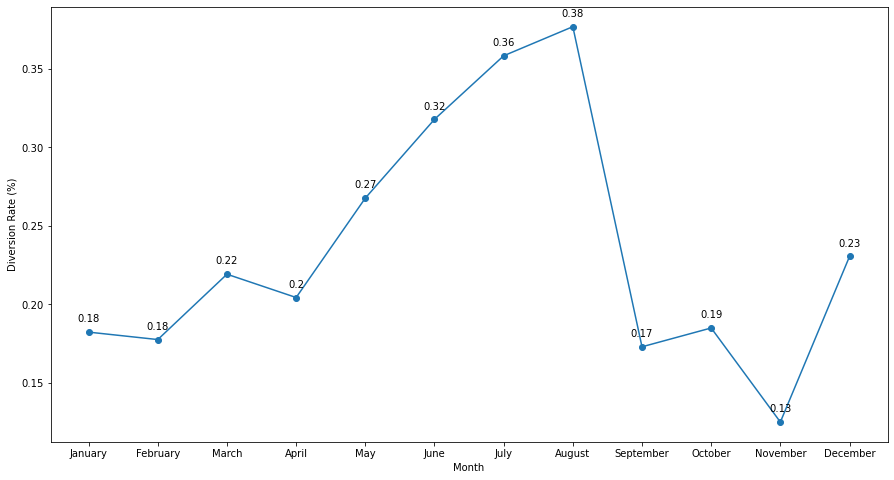

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(diversion_by_month['Month'], diversion_by_month['DiversionRatePercent'], marker='o', linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Diversion Rate (%)')
for i in range(len(diversion_by_month['DiversionRatePercent'])):
    plt.annotate(round(diversion_by_month['DiversionRatePercent'][i],2),
                 (i,diversion_by_month['DiversionRatePercent'][i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

### By Quarter (Delay, Cancellation, Diversion)

In [ ]:
#Delay by Quarter
sql_statement = '''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
)


SELECT * FROM tmp
ORDER BY TotalDelayAverage DESC
'''
delay_by_quarter = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(delay_by_quarter)

  Quarter  DepartingDelayAverage  ArrivalDelayAverage  TotalDelayAverage
0      Q3              15.774788            15.373641          31.148429
1      Q2              14.018641            13.592739          27.611379
2      Q4              12.920862            12.054118          24.974980
3      Q1              11.072499            10.953329          22.025828


In [ ]:
sql_statement = '''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
    AVG(f.DepDelayMinutes) DepartingDelayAverage,
    AVG(f.ArrDelayMinutes) ArrivalDelayAverage,
    AVG(f.DepDelayMinutes + f.ArrDelayMinutes) TotalDelayAverage
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
)


SELECT Quarter, DepartingDelayAverage, ArrivalDelayAverage, TotalDelayAverage,
    CASE
		WHEN Quarter = 'Q1' THEN 1
		WHEN Quarter = 'Q2' THEN 2
		WHEN Quarter = 'Q3' THEN 3
		WHEN Quarter = 'Q4' THEN 4
	END QuarterNumber
FROM tmp
ORDER BY QuarterNumber
'''
delay_by_quarter = pd.read_sql_query(sql_statement, conn)

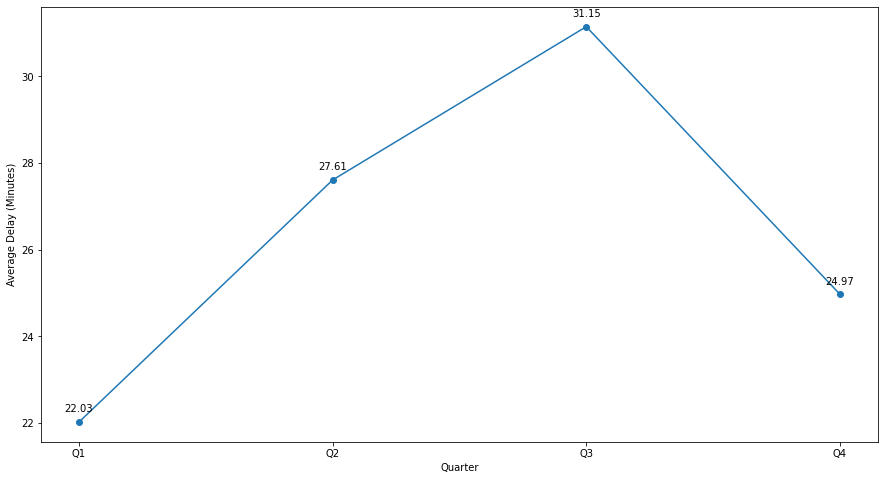

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(delay_by_quarter['Quarter'], delay_by_quarter['TotalDelayAverage'], marker='o', linestyle='solid')
plt.xlabel('Quarter')
plt.ylabel('Average Delay (Minutes)')
for i in range(len(delay_by_quarter['TotalDelayAverage'])):
    plt.annotate(round(delay_by_quarter['TotalDelayAverage'][i],2),
                 (i,delay_by_quarter['TotalDelayAverage'][i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

In [ ]:
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
    ORDER BY CancellationRatePercent DESC
)


SELECT * FROM tmp
ORDER BY CancellationRatePercent DESC
'''
cancellation_by_quarter = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(cancellation_by_quarter)

  Quarter  CancellationRatePercent
0      Q1                 3.461613
1      Q3                 1.932296
2      Q2                 1.657215
3      Q4                 1.622194


In [ ]:
#Cancellation rate by Quarter
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
((CAST(
SUM(
    CASE
        WHEN f.Cancelled = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) CancellationRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
    ORDER BY CancellationRatePercent DESC
)


SELECT Quarter, CancellationRatePercent,
    CASE
		WHEN Quarter = 'Q1' THEN 1
		WHEN Quarter = 'Q2' THEN 2
		WHEN Quarter = 'Q3' THEN 3
		WHEN Quarter = 'Q4' THEN 4
	END QuarterNumber
FROM tmp
ORDER BY QuarterNumber
'''
cancellation_by_quarter = pd.read_sql_query(sql_statement, conn)

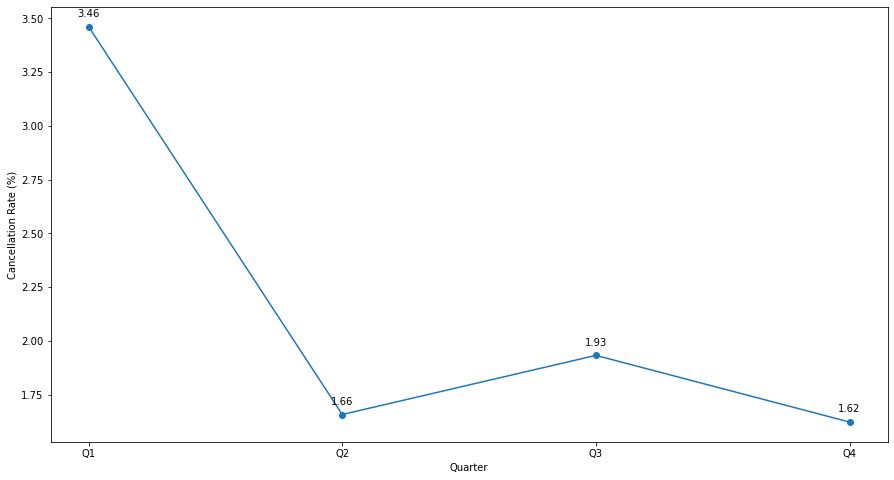

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(cancellation_by_quarter['Quarter'], cancellation_by_quarter['CancellationRatePercent'], marker='o', linestyle='solid')
plt.xlabel('Quarter')
plt.ylabel('Cancellation Rate (%)')
for i in range(len(cancellation_by_quarter['CancellationRatePercent'])):
    plt.annotate(round(cancellation_by_quarter['CancellationRatePercent'][i],2),
                 (i,cancellation_by_quarter['CancellationRatePercent'][i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

In [ ]:
#Diversion rate by Quarter
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
    ORDER BY DiversionRatePercent DESC
)


SELECT * FROM tmp
ORDER BY DiversionRatePercent DESC
'''
diversion_by_quarter = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(diversion_by_quarter)

  Quarter  DiversionRatePercent
0      Q3              0.318984
1      Q2              0.265530
2      Q1              0.194441
3      Q4              0.180282


In [ ]:
sql_statement='''
WITH tmp AS(SELECT
    CASE
		WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 1
        AND 3 THEN 'Q1'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 4
        AND 6 THEN 'Q2'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 7
        AND 9 THEN 'Q3'
        WHEN 0 + strftime('%m', f.FlightDate) BETWEEN 10
        AND 12 THEN 'Q4'
    end as Quarter,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
    
    
    FROM flights f
    WHERE f.IATA_Code_Marketing_Airline = 'DL'
    OR f.IATA_Code_Marketing_Airline = 'AA'
    OR f.IATA_Code_Marketing_Airline = 'UA'
    OR f.IATA_Code_Marketing_Airline = 'WN'
    GROUP BY Quarter
    ORDER BY DiversionRatePercent DESC
)


SELECT Quarter, DiversionRatePercent,
    CASE
		WHEN Quarter = 'Q1' THEN 1
		WHEN Quarter = 'Q2' THEN 2
		WHEN Quarter = 'Q3' THEN 3
		WHEN Quarter = 'Q4' THEN 4
	END QuarterNumber
FROM tmp
ORDER BY QuarterNumber
'''
diversion_by_quarter = pd.read_sql_query(sql_statement, conn)

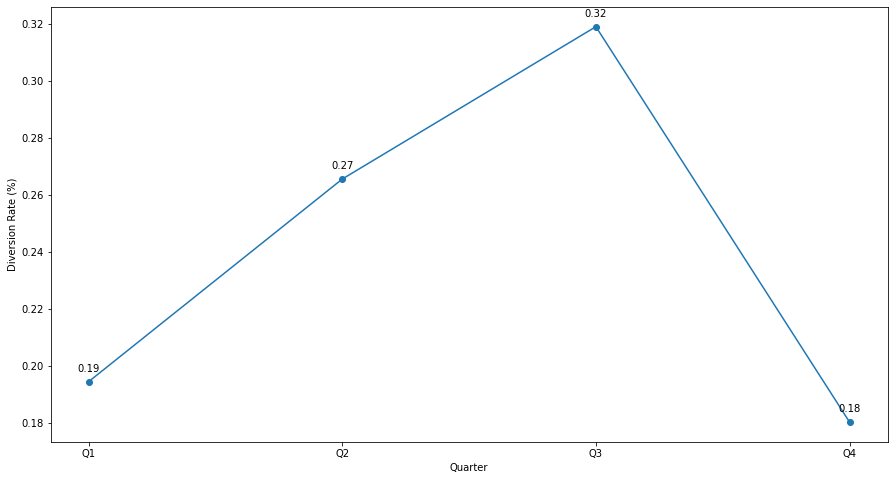

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(diversion_by_quarter['Quarter'], diversion_by_quarter['DiversionRatePercent'], marker='o', linestyle='solid')
plt.xlabel('Quarter')
plt.ylabel('Diversion Rate (%)')
for i in range(len(diversion_by_quarter['DiversionRatePercent'])):
    plt.annotate(round(diversion_by_quarter['DiversionRatePercent'][i],2),
                 (i,diversion_by_quarter['DiversionRatePercent'][i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

### By Source and Destination (Diversion)

In [ ]:
sql_statement = '''
SELECT r.Source AS Source, r.Destination AS Destination,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
FROM Flights f
INNER JOIN routes r ON f.routeID = r.routeID
WHERE f.IATA_Code_Marketing_Airline = 'DL'
OR f.IATA_Code_Marketing_Airline = 'AA'
OR f.IATA_Code_Marketing_Airline = 'UA'
OR f.IATA_Code_Marketing_Airline = 'WN'
GROUP BY r.Destination
ORDER BY DiversionRatePercent DESC, r.Destination
'''
diversion_by_route = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(diversion_by_route)

    Source Destination  DiversionRatePercent
0      SFO         OTH              2.979516
1      ORD         ASE              2.914263
2      SLC         SUN              1.954513
3      SEA         JNU              1.840491
4      SEA         SIT              1.840491
..     ...         ...                   ...
329    HNL         GUM              0.000000
330    PHL         HVN              0.000000
331    PHL         IPT              0.000000
332    ATL         STX              0.000000
333    PHL         SWF              0.000000

[334 rows x 3 columns]


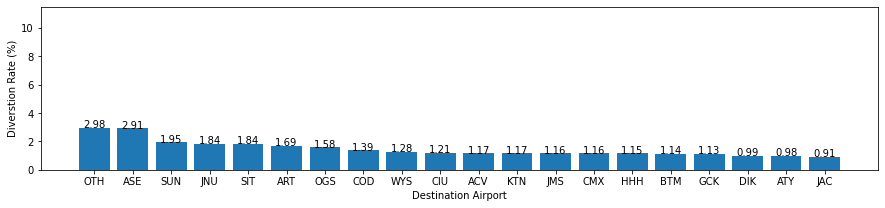

In [ ]:
plt.figure(figsize=(15, 3))
destination = list(diversion_by_route['Destination'])[:20] #Taking top 20
diversions = list(diversion_by_route['DiversionRatePercent'][:20])
plt.bar(destination, diversions)
plt.ylim(0,11.5)
plt.xlabel('Destination Airport')
plt.ylabel('Diverstion Rate (%)')
for i in range(len(destination)):
    plt.text(i,diversions[i],round(diversions[i],2), ha = 'center')
plt.show()
#Limit to top 20

### By Distance (Diversion)

In [ ]:
sql_statement = '''
SELECT f.Distance AS Distance,
((CAST(
SUM(
    CASE
        WHEN f.Diverted = 'False' THEN 0
        ELSE 1
    END
) AS REAL
) / COUNT(*)) * 100) DiversionRatePercent
FROM Flights f
WHERE f.IATA_Code_Marketing_Airline = 'DL'
OR f.IATA_Code_Marketing_Airline = 'AA'
OR f.IATA_Code_Marketing_Airline = 'UA'
OR f.IATA_Code_Marketing_Airline = 'WN'
GROUP BY Distance
ORDER BY DiversionRatePercent DESC
'''
diversion_by_distance = pd.read_sql_query(sql_statement, conn)

In [ ]:
print(diversion_by_distance)

      Distance  DiversionRatePercent
0         92.0            100.000000
1         82.0            100.000000
2         71.0            100.000000
3         68.0             61.538462
4       1304.0              5.607477
...        ...                   ...
1440      94.0              0.000000
1441      90.0              0.000000
1442      80.0              0.000000
1443      66.0              0.000000
1444      45.0              0.000000

[1445 rows x 2 columns]


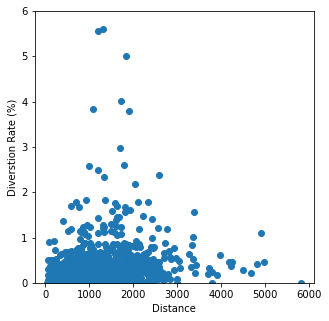

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(diversion_by_distance['Distance'], diversion_by_distance['DiversionRatePercent'])
plt.ylim(0,6)
plt.xlabel('Distance')
plt.ylabel('Diverstion Rate (%)')
plt.show()
#This plot does not include the four outliers with diversion rates of 100% for three of them
# and 61.5% for one of them

### By Distance (Delay)

In [ ]:
sql_stmt = """with da as (with delay_analysis as (with routes_modified as (SELECT r.RouteID as routeID, r.Source || '-' || r.Destination as route,
f.Distance as dist, f.DepDelayMinutes as delay FROM flights f 
inner join routes r on f.RouteID = r.RouteID order by delay desc)
SELECT
  routeID,
  route,
  dist,
  sum(delay) as sum_delay,
  COUNT(route) AS occurences

FROM
  routes_modified

GROUP BY 
  route

ORDER BY
  occurences DESC
  
Limit 20)

select * from delay_analysis
)
select routeID,
  route,
  dist,
  sum_delay/occurences as avg_delay,
  occurences
from da
order by occurences desc
"""
res = execute_sql_statement(sql_stmt, conn_1)
res = pd.DataFrame(res, columns=['RouteID', 'Route', 'Distance', 'Average Departure Delay', 'Frequency'])
res

,RouteID,Route,Distance,Average Departure Delay,Frequency
0,5250,LAX-SFO,337.0,11.043002,16162
1,207,SFO-LAX,337.0,10.120124,16150
2,200,LAX-LAS,236.0,12.289240,14628
3,4559,LAS-LAX,236.0,14.258029,14603
4,3231,HNL-OGG,100.0,5.770076,13922
5,2144,OGG-HNL,100.0,7.271525,13914
6,908,LGA-ORD,733.0,14.864825,13427
7,3847,ORD-LGA,733.0,14.984877,13423
8,2688,LAX-JFK,2475.0,15.422415,13134
9,4140,JFK-LAX,2475.0,15.264040,13123


In [ ]:
res.sort_values('Average Departure Delay', ascending = False)

,RouteID,Route,Distance,Average Departure Delay,Frequency
12,2278,DEN-PHX,602.0,16.647870,11970
16,5232,MCO-ATL,404.0,16.089845,11876
8,2688,LAX-JFK,2475.0,15.422415,13134
9,4140,JFK-LAX,2475.0,15.264040,13123
17,2686,ATL-MCO,404.0,15.206599,11820
7,3847,ORD-LGA,733.0,14.984877,13423
6,908,LGA-ORD,733.0,14.864825,13427
13,3985,DCA-BOS,399.0,14.325812,11921
18,4578,ATL-FLL,581.0,14.269985,11471
3,4559,LAS-LAX,236.0,14.258029,14603


In [ ]:
res.sort_values('Distance', ascending = False)

,RouteID,Route,Distance,Average Departure Delay,Frequency
8,2688,LAX-JFK,2475.0,15.422415,13134
9,4140,JFK-LAX,2475.0,15.264040,13123
6,908,LGA-ORD,733.0,14.864825,13427
7,3847,ORD-LGA,733.0,14.984877,13423
12,2278,DEN-PHX,602.0,16.647870,11970
15,3444,PHX-DEN,602.0,13.140900,11895
19,5119,FLL-ATL,581.0,14.254881,11421
18,4578,ATL-FLL,581.0,14.269985,11471
17,2686,ATL-MCO,404.0,15.206599,11820
16,5232,MCO-ATL,404.0,16.089845,11876


In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RouteID                  20 non-null     int64  
 1   Route                    20 non-null     object 
 2   Distance                 20 non-null     float64
 3   Average Departure Delay  20 non-null     float64
 4   Frequency                20 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [ ]:
res.describe()

,RouteID,Distance,Average Departure Delay,Frequency
count,20.000000,20.000000,20.000000,20.000000
mean,3117.400000,599.600000,12.620641,13048.500000
std,1724.375109,671.682914,3.323653,1467.383762
min,200.000000,100.000000,5.770076,11421.000000
25%,2123.250000,236.000000,10.812283,11913.750000
50%,3337.500000,401.500000,14.256455,12612.500000
75%,4563.750000,602.000000,15.040307,13916.000000
max,5315.000000,2475.000000,16.647870,16162.000000


In [ ]:
res.corr()

,RouteID,Distance,Average Departure Delay,Frequency
RouteID,1.000000,0.068589,0.173817,-0.250975
Distance,0.068589,1.000000,0.490948,-0.072943
Average Departure Delay,0.173817,0.490948,1.000000,-0.304093
Frequency,-0.250975,-0.072943,-0.304093,1.000000


<AxesSubplot:>

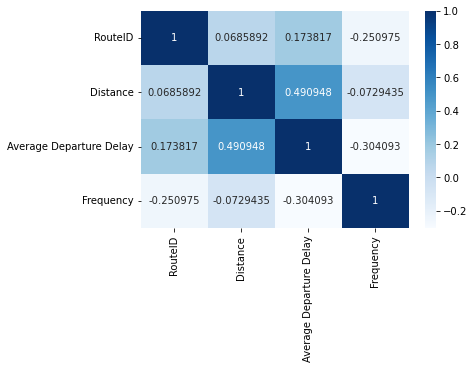

In [ ]:
sns.heatmap(res.corr(), annot=True, fmt="g", cmap='Blues')

c:\Users\arnav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Departure Delay'>

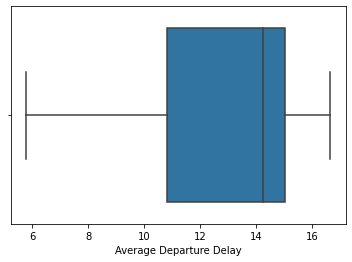

In [ ]:
sns.boxplot(res['Average Departure Delay'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


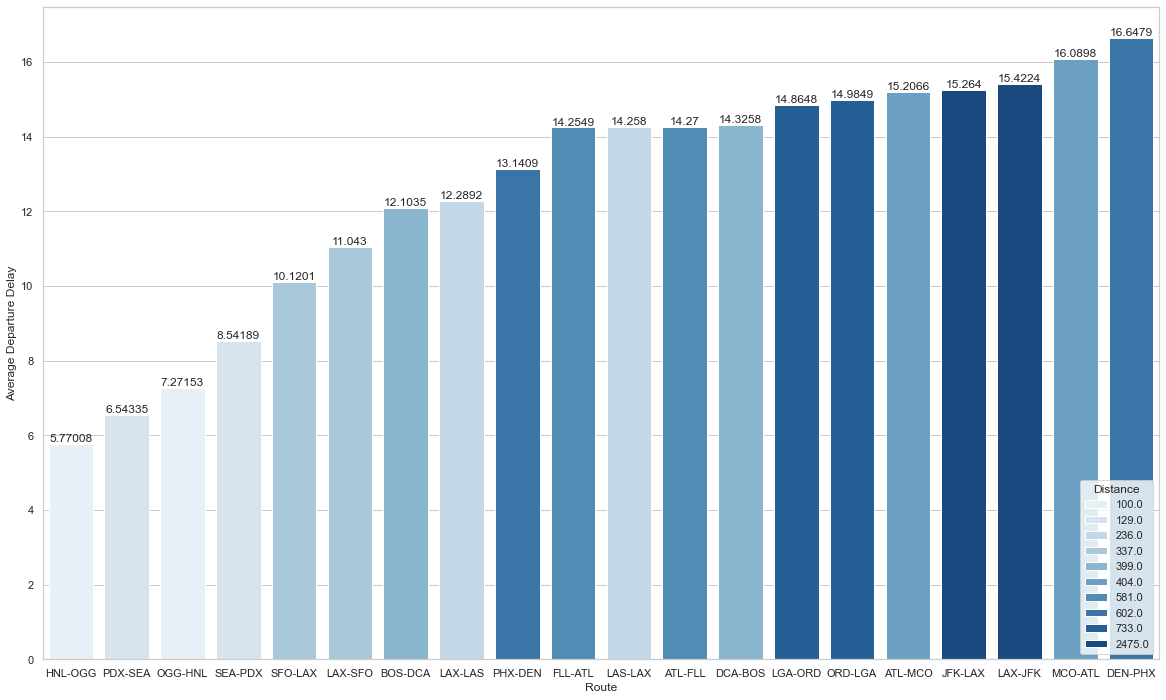

In [ ]:
res.sort_values(by = 'Average Departure Delay', inplace=True)
plt.figure(figsize=(20,12))
plt.legend(loc='upper right')
sns.set(style="whitegrid", color_codes=True)
ax = sns.barplot(x = res['Route'], y = res['Average Departure Delay'], hue=res['Distance'], dodge = False, palette='Blues')
sns.move_legend(ax, "lower right")

for i in ax.containers:
    ax.bar_label(i,)

### Top Routes Analyzed based on Months

In [ ]:
sql='''
    WITH ROUTE_TABLE AS 
    (
    SELECT COUNT(RouteID)route_freq,RouteID 
    FROM flights 
    GROUP BY RouteID
    )
    SELECT route_freq,Source,Destination 
    FROM ROUTE_TABLE    
    INNER JOIN routes r ON ROUTE_TABLE.RouteID=r.RouteID
    ORDER BY -route_freq
    LIMIT 20
    '''

In [ ]:
top_10_routes=pd.read_sql_query(sql,con=conn).loc[:,['Source',"Destination"]]

In [ ]:
top_10_routes=tuple(top_10_routes.values)

In [ ]:
def get_route(route,year):
    sql=f'''
        WITH TIME_TABLE AS 
        (
            SELECT
                CASE
                WHEN strftime('%m', FlightDate) = '01' THEN 'January'
                WHEN strftime('%m', FlightDate) = '02' THEN 'February'
                WHEN strftime('%m', FlightDate) = '03' THEN 'March'
                WHEN strftime('%m', FlightDate) = '04' THEN 'April'
                WHEN strftime('%m', FlightDate) = '05' THEN 'May'
                WHEN strftime('%m', FlightDate) = '06' THEN 'June'
                WHEN strftime('%m', FlightDate) = '07' THEN 'July'
                WHEN strftime('%m', FlightDate) = '08' THEN 'August'
                WHEN strftime('%m', FlightDate) = '09' THEN 'September'
                WHEN strftime('%m', FlightDate) = '10' THEN 'October'
                WHEN strftime('%m', FlightDate) = '11' THEN 'November'
                WHEN strftime('%m', FlightDate) = '12' THEN 'December'
            END FlightDate,
            strftime('%Y', FlightDate) AS Year,
            Source,Destination
            FROM flights F
            INNER JOIN routes r ON r.RouteID=F.RouteID
            WHERE Source='{top_10_routes[route][0]}' AND Destination='{top_10_routes[route][1]}' AND Year='{year}'
        )
        SELECT *,COUNT(*)freq FROM TIME_TABLE
        GROUP BY FlightDate
        '''
    return sql,top_10_routes[route][0],top_10_routes[route][1]

In [ ]:
airports={"LAX":"Los Angeles","SFO":"San Francisco","LAS":"Las Vegas","HNL":"Honolulu","OGG":"Kahului","LGA":"Queens,NY","ORD":"Chicago",
    "JFK":"JFK,NY","SEA":"Seattle, WA","PDX":"Portland, Oregon","DEN":"Denver,Colorado","DCA":"Washington Reagan National, DC",
"BOS":"Boston Logan,Massachusetts","PHX":"Phoenix Sky Harbor,Arizona","MCO":"Orlando International Airport",
 "ATL":"Atlanta International airport","FLL":"Fort Lauderdale,Florida"}

#### Frequency of flights from top 10 frequently used routes in 2022

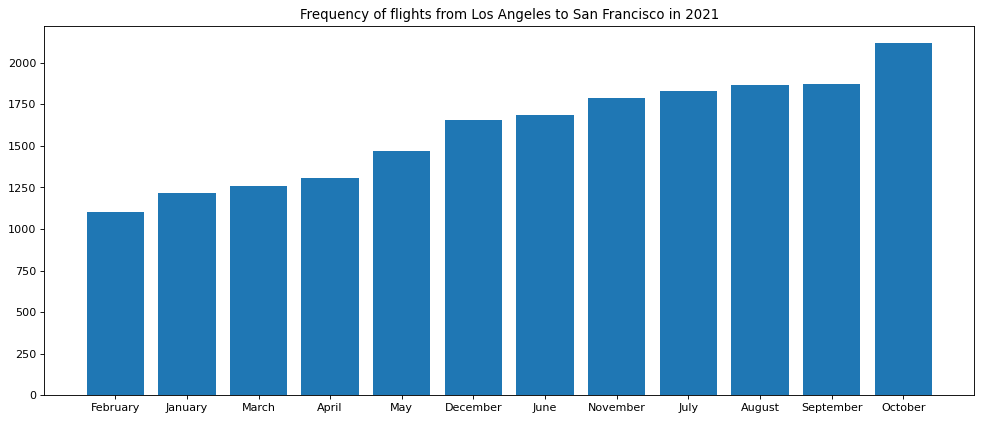

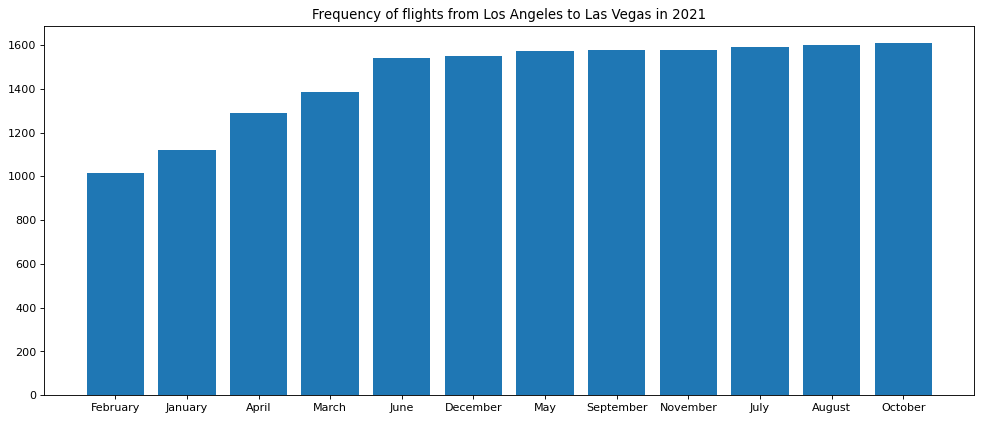

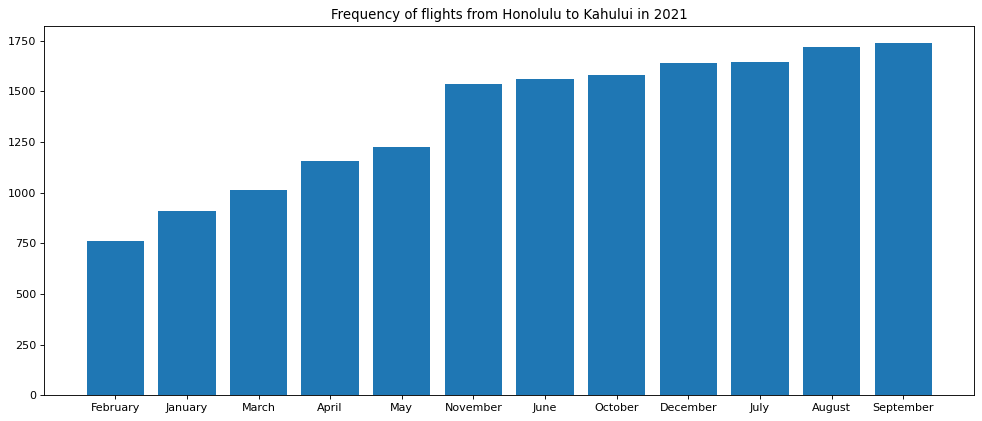

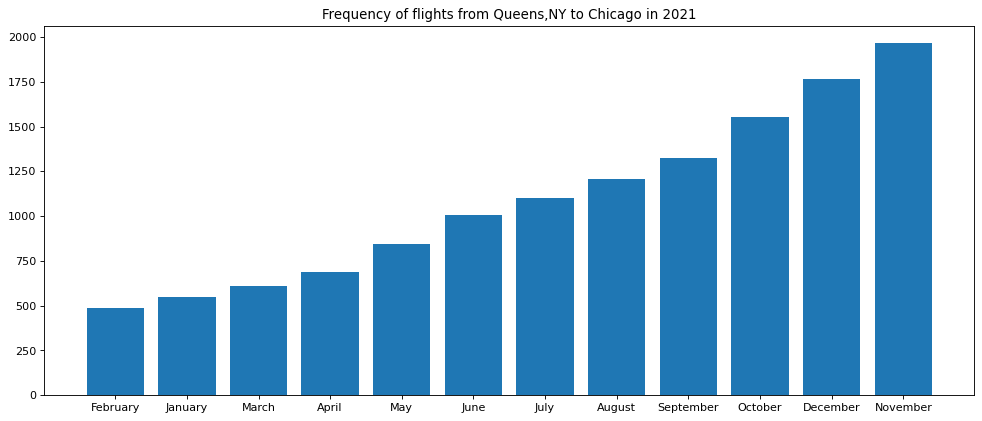

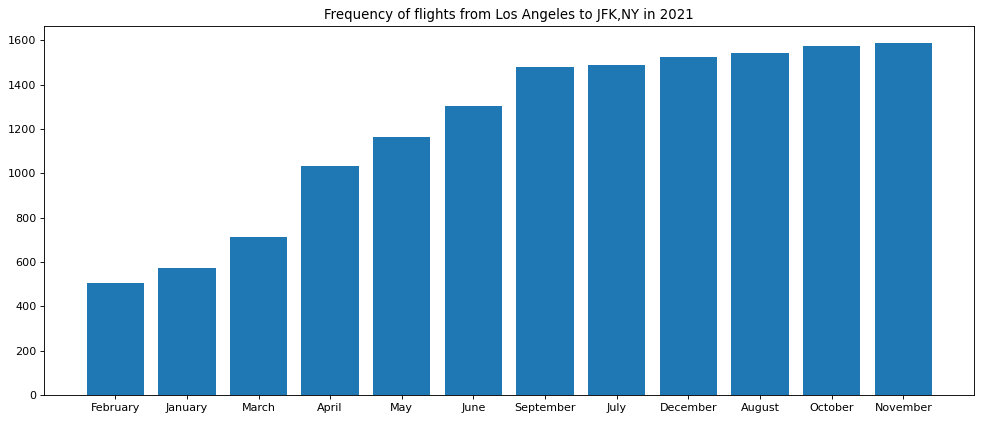

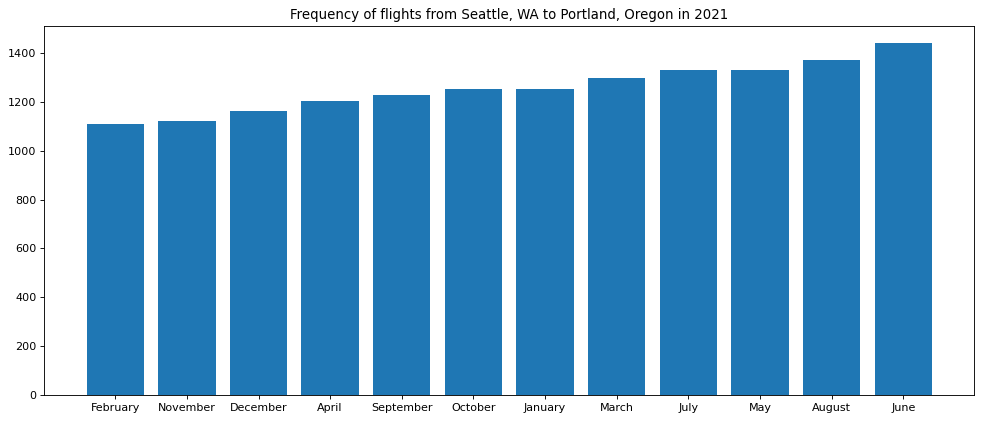

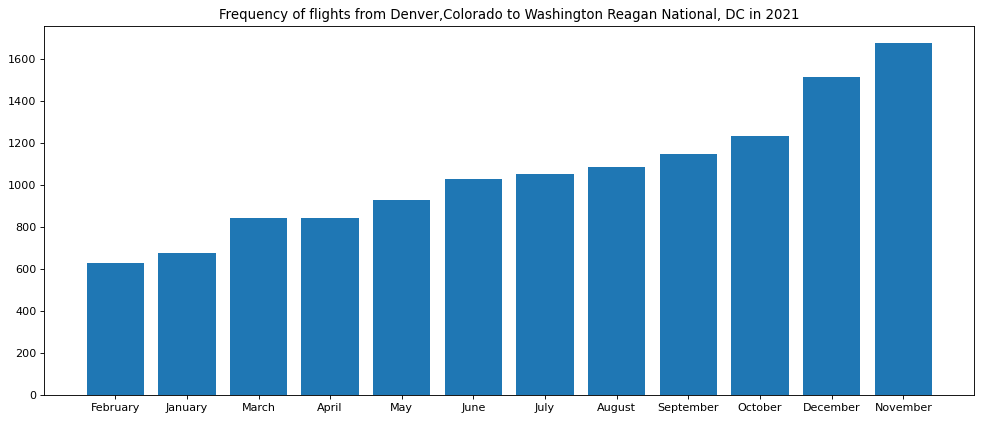

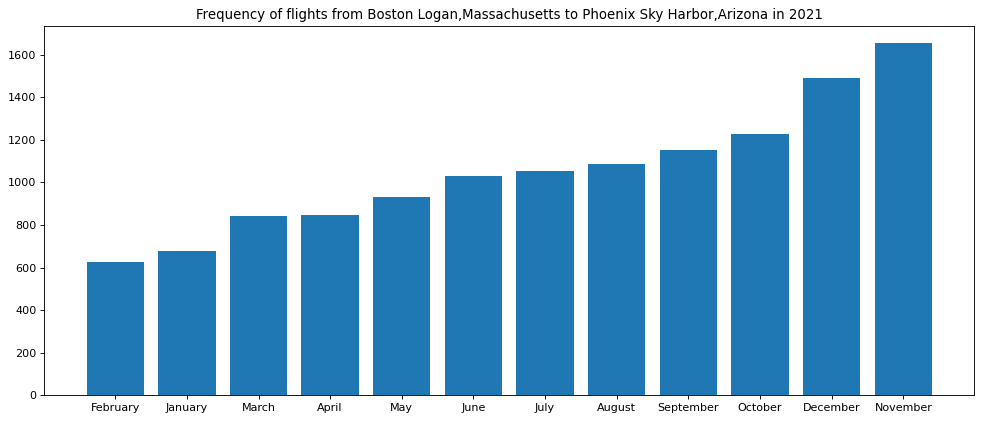

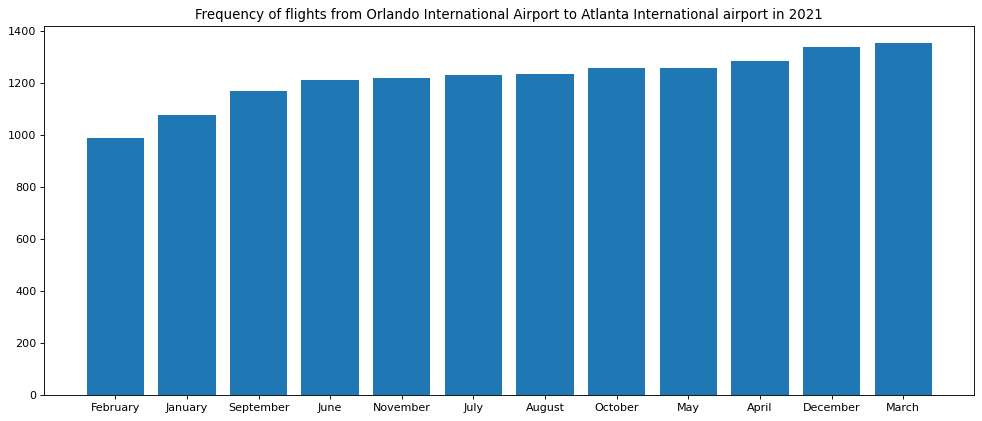

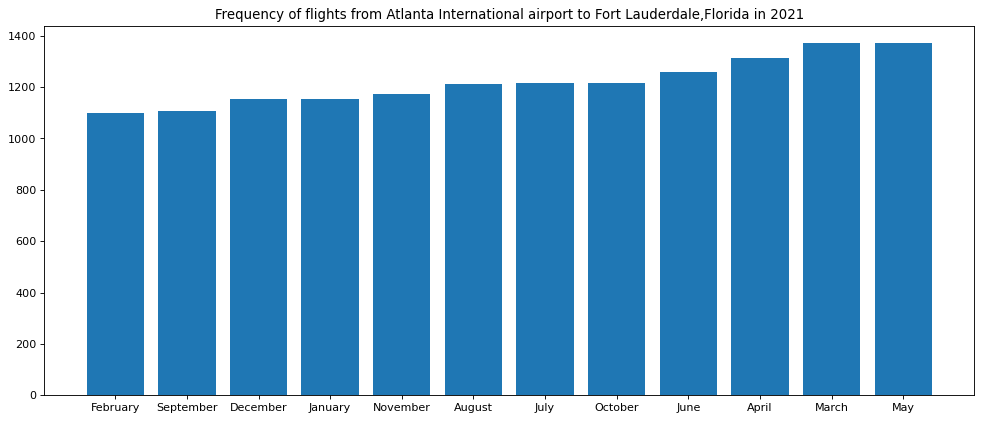

In [ ]:
for i in range(20):

    if i%2==0:
        sql,source,dest=get_route(i,2021)
        route1=pd.read_sql_query(sql,con=conn)
        route1_name=route1.loc[:,"Source"].values[0]
    else:
        sql,source,dest=get_route(i,2021)
        route2=pd.read_sql_query(sql,con=conn)
        route2_name=route2.loc[:,"Source"].values[0]
        
        route_comb=pd.concat([route1,route2])
        sum_df=route_comb.groupby("FlightDate").sum("freq")
        dat=sorted(list(zip(sum_df.index,sum_df['freq'].values)),key=lambda x:x[1])
        month=list(map(lambda x:x[0],dat))
        freq=list(map(lambda x:x[1],dat))
        figure(figsize=(15, 6), dpi=80)
        
        plt.bar(month,freq)
        plt.title(f"Frequency of flights from {airports[route1_name]} to {airports[route2_name]} in 2021")
        plt.show()
        

- Frequency of flights for the first few months of 2021 for most of the considered routes are low,probably due to covid restrictions.

#### Frequency of flights from top 10 frequently used routes in 2022

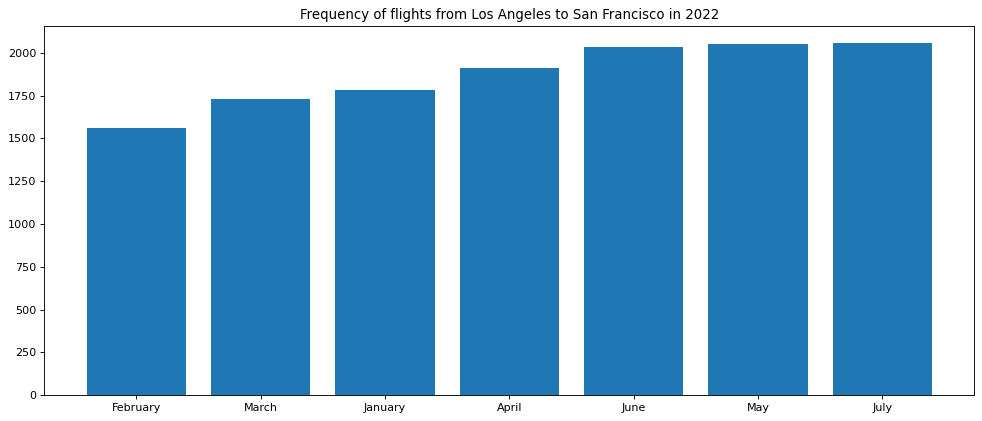

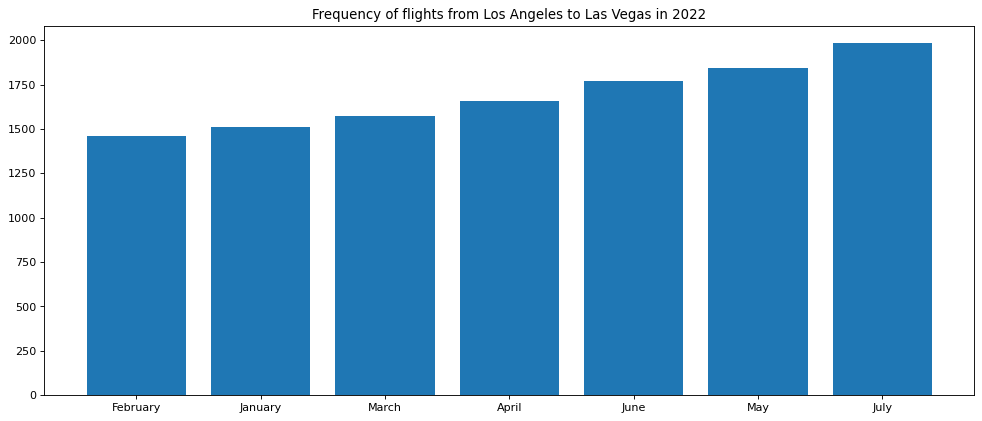

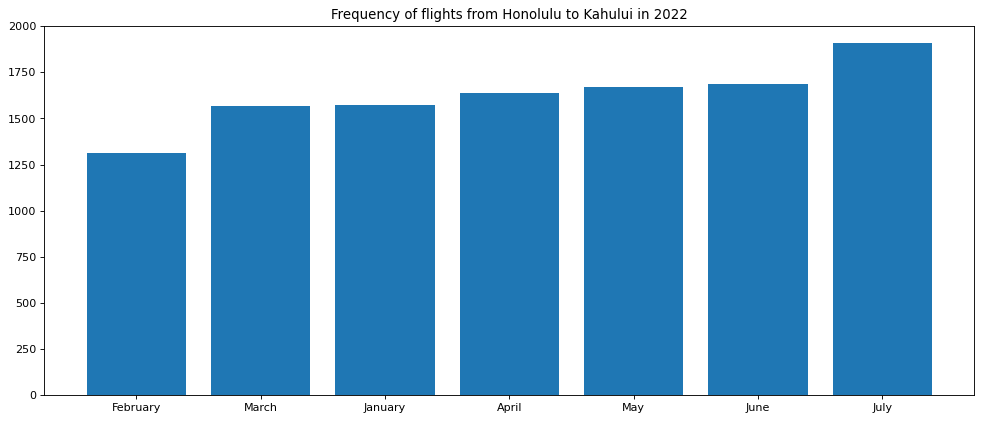

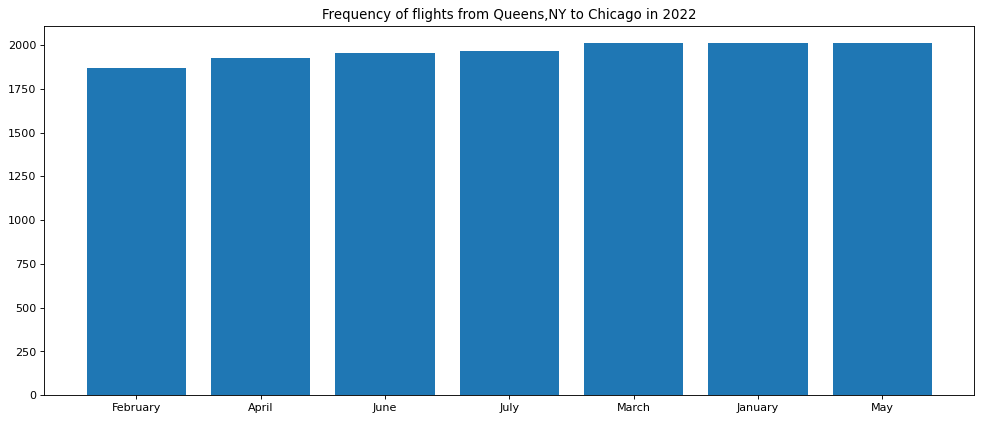

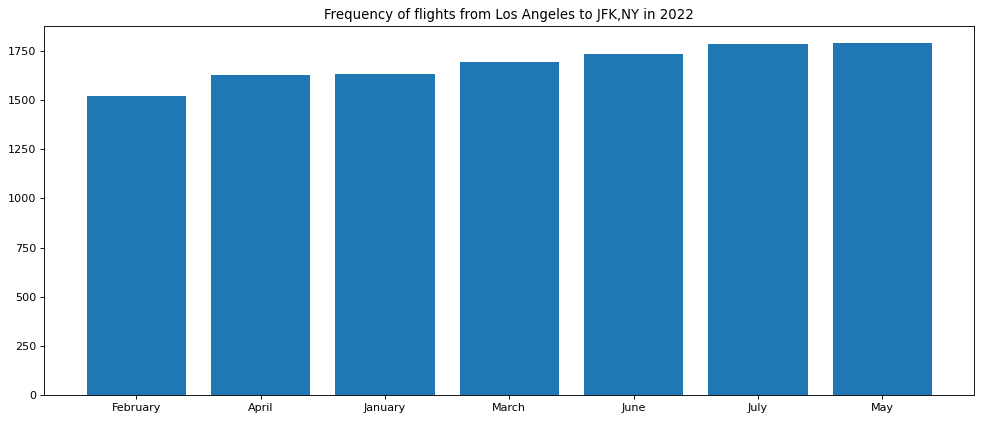

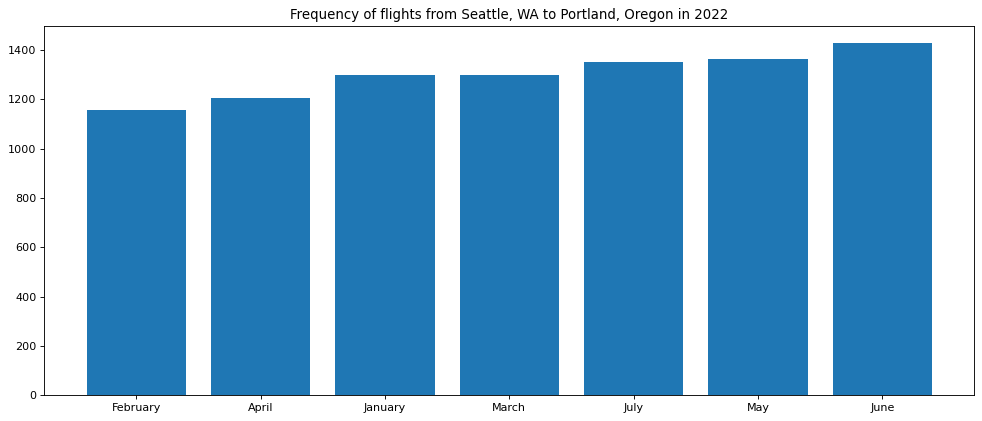

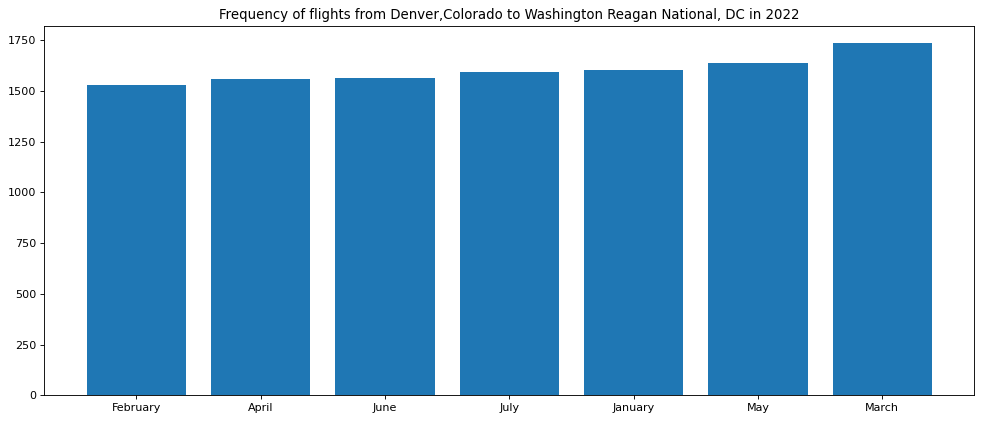

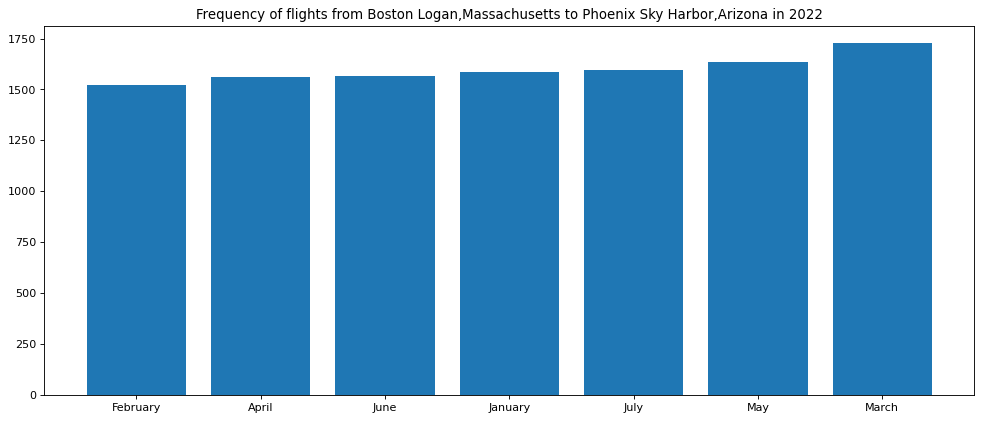

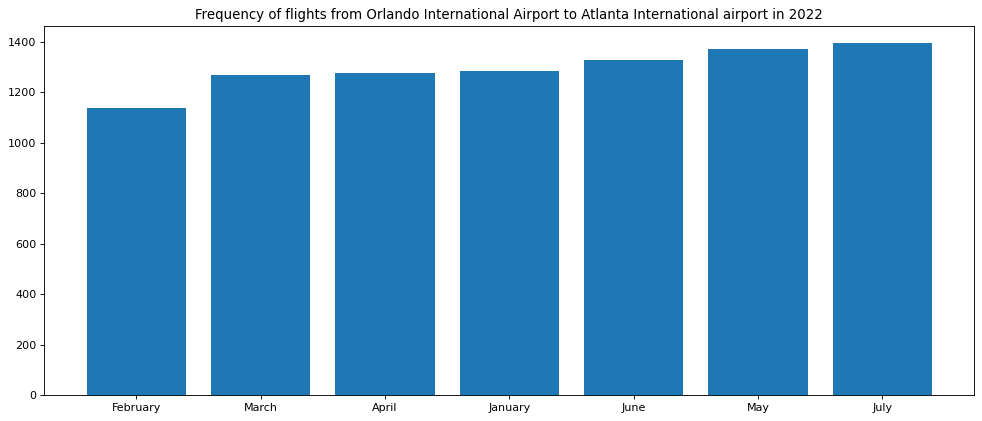

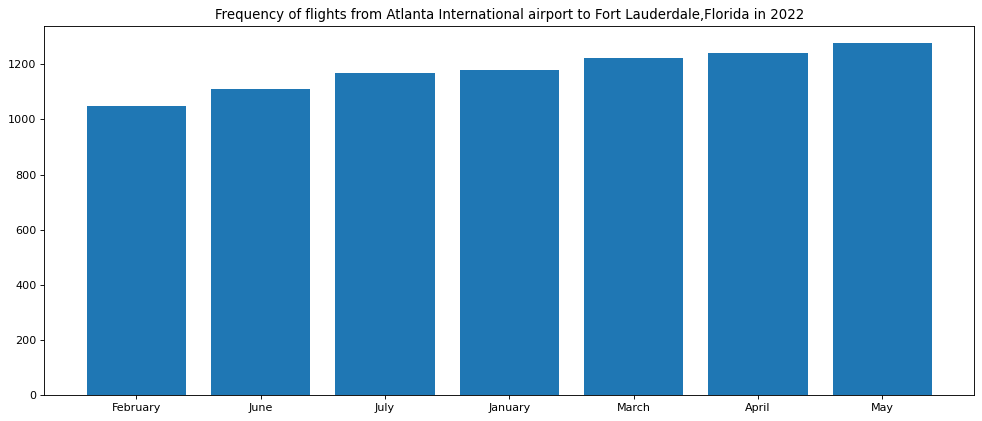

In [ ]:
for i in range(20):

    if i%2==0:
        sql,source,dest=get_route(i,2022)
        route1=pd.read_sql_query(sql,con=conn)
        route1_name=route1.loc[:,"Source"].values[0]
    else:
        sql,source,dest=get_route(i,2022)
        route2=pd.read_sql_query(sql,con=conn)
        route2_name=route2.loc[:,"Source"].values[0]
        
        route_comb=pd.concat([route1,route2])
        sum_df=route_comb.groupby("FlightDate").sum("freq")
        dat=sorted(list(zip(sum_df.index,sum_df['freq'].values)),key=lambda x:x[1])
        month=list(map(lambda x:x[0],dat))
        freq=list(map(lambda x:x[1],dat))
        figure(figsize=(15, 6), dpi=80)

        plt.bar(month,freq)
        plt.title(f"Frequency of flights from {airports[route1_name]} to {airports[route2_name]} in 2022")
        plt.show()
        

- Frequency of flights in the year 2022 is almost same for all of the months, probably as the covid restrictions were lifted

## Model Building

In [2]:
# Creating Connection
conn_main = create_connection("main.db")

In [4]:
data_df_model = pd.read_sql_query(sql_stmt_model_data,conn_main)

In [5]:
data_df_model.head()

,Month,FlightDate,routeID,DepDelayMinutes,IATA_Code_Marketing_Airline,cancelled,Source,Destination
0,3,2021-03-03,6289,0.0,AA,False,SGU,PHX
1,3,2021-03-03,5385,0.0,AA,False,PHX,SGU
2,3,2021-03-03,6437,0.0,AA,False,MHT,ORD
3,3,2021-03-03,4373,0.0,AA,False,DFW,TRI
4,3,2021-03-03,1544,0.0,AA,False,PHX,BFL


In [26]:
data_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10390189 entries, 0 to 10390188
Data columns (total 8 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Month                        int64  
 1   FlightDate                   object 
 2   routeID                      int64  
 3   DepDelayMinutes              float64
 4   IATA_Code_Marketing_Airline  object 
 5   cancelled                    object 
 6   Source                       object 
 7   Destination                  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 634.2+ MB


Encoding and Preparing for Model Building

In [6]:
data_df_model["DepDelayMinutes"] = pd.to_numeric(data_df_model["DepDelayMinutes"])

In [7]:
data_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10390189 entries, 0 to 10390188
Data columns (total 8 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Month                        int64  
 1   FlightDate                   object 
 2   routeID                      int64  
 3   DepDelayMinutes              float64
 4   IATA_Code_Marketing_Airline  object 
 5   cancelled                    object 
 6   Source                       object 
 7   Destination                  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 634.2+ MB


In [8]:
data_df_model["delayed"] = np.where(data_df_model["DepDelayMinutes"] > 10,1,0)

In [9]:
data_df_model.head()

,Month,FlightDate,routeID,DepDelayMinutes,IATA_Code_Marketing_Airline,cancelled,Source,Destination,delayed
0,3,2021-03-03,6289,0.0,AA,False,SGU,PHX,0
1,3,2021-03-03,5385,0.0,AA,False,PHX,SGU,0
2,3,2021-03-03,6437,0.0,AA,False,MHT,ORD,0
3,3,2021-03-03,4373,0.0,AA,False,DFW,TRI,0
4,3,2021-03-03,1544,0.0,AA,False,PHX,BFL,0


In [10]:
columns= ['IATA_Code_Marketing_Airline','Source', 'Destination']
le=LabelEncoder()
for i in columns:
    data_df_model[i]=le.fit_transform(data_df_model[i])

In [11]:
data_df_model.head()

,Month,FlightDate,routeID,DepDelayMinutes,IATA_Code_Marketing_Airline,cancelled,Source,Destination,delayed
0,3,2021-03-03,6289,0.0,0,False,328,275,0
1,3,2021-03-03,5385,0.0,0,False,275,328,0
2,3,2021-03-03,6437,0.0,0,False,232,260,0
3,3,2021-03-03,4373,0.0,0,False,99,359,0
4,3,2021-03-03,1544,0.0,0,False,275,34,0


In [12]:
data_X = data_df_model[["Month", "IATA_Code_Marketing_Airline", "Source", "Destination"]]

In [13]:
data_Y = data_df_model["delayed"]

## Applying Logistic Regression

In [45]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=i)

    #creating Logistic Regression classifier
    clf = LogisticRegression(random_state=i)
    clf.fit(X_train, y_train)
    
    #determining the score
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("Test: {}, Train: {} and Random State: {}".format(test_score, train_score, i))

Test: 0.7841314740153934, Train: 0.7839760129477917 and Random State: 0
Test: 0.7837152159873881, Train: 0.7840800774673126 and Random State: 1
Test: 0.7839332100760429, Train: 0.7840255789385925 and Random State: 2
Test: 0.7840679525590966, Train: 0.7839918933137764 and Random State: 3
Test: 0.7835694053717979, Train: 0.7841165301255957 and Random State: 4


## Applying KNN

In [14]:
X_train, X_test, y_train, y_test = train_test_split( data_X, data_Y, test_size=0.1, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9351170, 4) (9351170,)
Test set: (1039019, 4) (1039019,)


In [52]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Train set Accuracy:  0.77180192425119
Test set Accuracy:  0.7690802574351383


In [15]:
Ks = 10
mean_accuracy = np.zeros((Ks-1))
std_accuracy = np.zeros((Ks-1))
confusion_matrix = []
for n in range(1,Ks):
    
    #Train Model and Predict  
    print("Calculating for K: ", n)
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_accuracy[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])


Calculating for K:  1
Calculating for K:  2
Calculating for K:  3
Calculating for K:  4
Calculating for K:  5
Calculating for K:  6
Calculating for K:  7
Calculating for K:  8
Calculating for K:  9


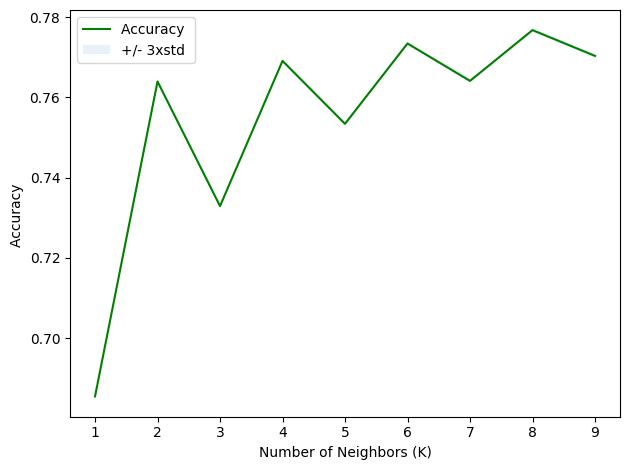

In [20]:
plt.plot(range(1,Ks),mean_accuracy,'g')
plt.fill_between(range(1,Ks),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


## Applying Random Forest

In [21]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.1, random_state=i)

    #creating random forest classifier
    clf = RandomForestClassifier(random_state=i)
    clf.fit(X_train, y_train)
    
    #determining the score
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("Test: {}, Train: {} and Random State: {}".format(test_score, train_score, i))

Test: 0.7855149905824629, Train: 0.7885315955115777 and Random State: 0
Test: 0.7855708124682994, Train: 0.7885488126084758 and Random State: 1


KeyboardInterrupt: 